In [1]:
from my_apis import reddit_thread_pull
from qgrid import show_grid
import sport_sentiment
from sport_sentiment import eda
from sport_sentiment import my_model
import pandas as pd
import numpy as np


## READ DATA

In [2]:
train_read = pd.read_csv("my_training_data/train.csv", index_col = 0)
train_read = train_read.sample(frac = 1).reset_index(drop = True) #shuffles data

## EXPLORE DATA

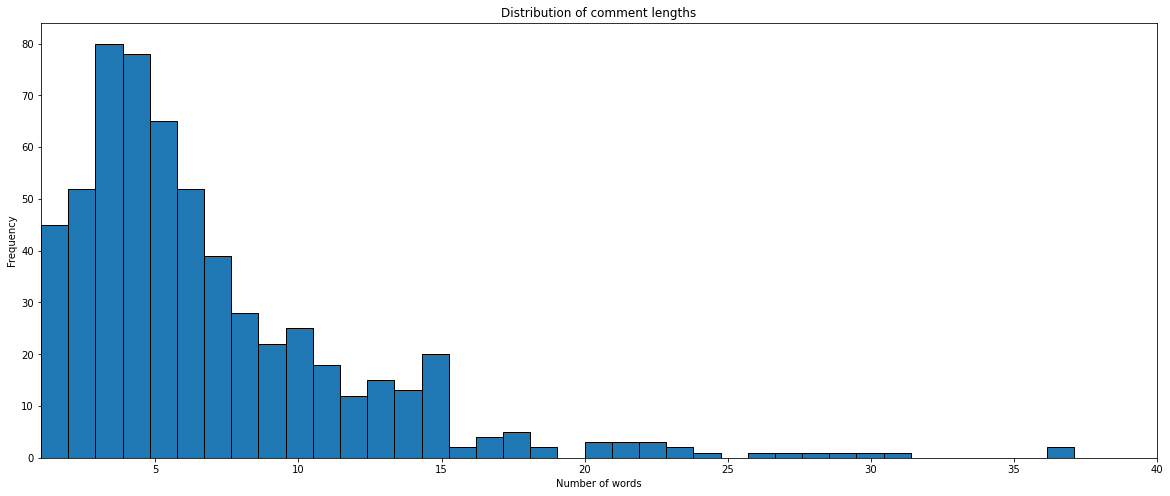

In [3]:
eda.plot_comment_length(train_read.text)

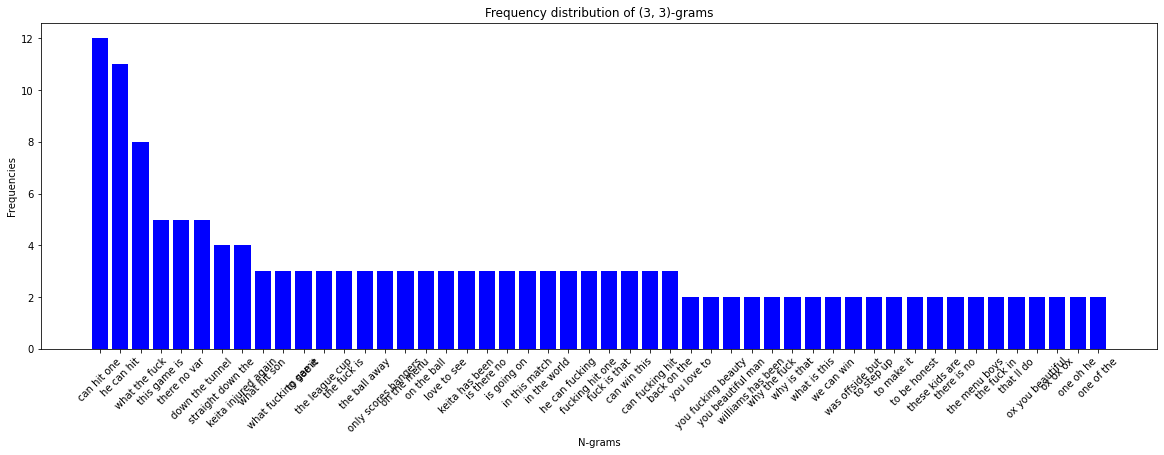

In [4]:
eda.plot_frequency_distribution_of_ngrams(texts = train_read.text, ngram_range = (3,3), num_ngrams = 50)

In [5]:
# Calculate number of samples/number of words per sample ratio. If this number is less than 1500 tokenize text as n-grams and
# use a simple MLP. Otherwise, tokenize as sequences. 
min_samples_for_sequential = eda.median_num_words_in_sample(train_read.text)*1500
samples_words_ratio = len(train_read)/eda.median_num_words_in_sample(train_read.text) 

print("The minimum number of samples needed (for texts like these) to use a sequential model is: {} (a ratio of 1500). While the current \
number is {} with ratio {}.".format(min_samples_for_sequential,len(train_read),round(samples_words_ratio,0)))

The minimum number of samples needed (for texts like these) to use a sequential model is: 7500.0 (a ratio of 1500). While the current number is 602 with ratio 120.0.


## PREPROCESS DATA

## CREATE MODEL

In [8]:
model = my_model()
model.train_ngram_model(data)

Train on 450 samples, validate on 152 samples
Epoch 1/1000
450/450 - 0s - loss: 0.6914 - acc: 0.5444 - val_loss: 0.6823 - val_acc: 0.6053
Epoch 2/1000
450/450 - 0s - loss: 0.6804 - acc: 0.6089 - val_loss: 0.6748 - val_acc: 0.6513
Epoch 3/1000
450/450 - 0s - loss: 0.6663 - acc: 0.7200 - val_loss: 0.6668 - val_acc: 0.6908
Epoch 4/1000
450/450 - 0s - loss: 0.6541 - acc: 0.7600 - val_loss: 0.6579 - val_acc: 0.6974
Epoch 5/1000
450/450 - 0s - loss: 0.6429 - acc: 0.7889 - val_loss: 0.6487 - val_acc: 0.6974
Epoch 6/1000
450/450 - 0s - loss: 0.6309 - acc: 0.8089 - val_loss: 0.6389 - val_acc: 0.7434
Epoch 7/1000
450/450 - 0s - loss: 0.6157 - acc: 0.8378 - val_loss: 0.6282 - val_acc: 0.7895
Epoch 8/1000
450/450 - 0s - loss: 0.6004 - acc: 0.8689 - val_loss: 0.6167 - val_acc: 0.8092
Epoch 9/1000
450/450 - 0s - loss: 0.5813 - acc: 0.8844 - val_loss: 0.6044 - val_acc: 0.8224
Epoch 10/1000
450/450 - 0s - loss: 0.5648 - acc: 0.8889 - val_loss: 0.5911 - val_acc: 0.8289
Epoch 11/1000
450/450 - 0s - loss

(<tensorflow.python.keras.engine.sequential.Sequential at 0x1acc592c2b0>,
 0.81578946,
 0.3975529655029899)